## Decision Trees

To figure out the underlying mathematical principle of decision trees, I recommend exploring the following self-guided resources:

* [Intro to Decision Trees - ISLR](https://www.youtube.com/watch?v=XvdLKUOldkE&list=PLAOUn-KLSAVOqj5TG8E1HTb8Txwxe6OtV)
* [Tree-Based Methods Ch. 8.1](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)

In summary, decision trees are "function-less" statistical learning models that splits data into optimal partitions by finding which splits result in the least "error" or "impurity." A common metric for error is [gini index](https://blog.quantinsti.com/gini-index/).

By using a "greedy" top-down approach, we select the "best" splits and further formalize these splits into "decision trees." 

This statistical learning method is perfect for non-normal data, and is a robust learning model when dealing with [heteroscedasticity](https://www.investopedia.com/terms/h/heteroskedasticity.asp#:~:text=Investopedia%20%2F%20Joules%20Garcia-,What%20Is%20Heteroskedasticity%3F,periods%2C%20are%20non%2Dconstant.) and large outliers.

However, we must always validate our results against a test set to ensure that we are not overfitting data.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree

# load dataframe
df = pd.read_csv("../../week_7/data/bank-cleaned.csv")

X = df.loc[:, df.columns != 'y']
y = df["y"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

[Text(0.5, 0.8333333333333334, 'poutcome_success <= 0.5\ngini = 0.208\nsamples = 35572\nvalue = [31388, 4184]\nclass = no'),
 Text(0.25, 0.5, 'age <= 60.5\ngini = 0.179\nsamples = 34386\nvalue = [30977, 3409]\nclass = no'),
 Text(0.125, 0.16666666666666666, 'gini = 0.169\nsamples = 33647\nvalue = [30506, 3141]\nclass = no'),
 Text(0.375, 0.16666666666666666, 'gini = 0.462\nsamples = 739\nvalue = [471, 268]\nclass = no'),
 Text(0.75, 0.5, 'housing_no <= 0.5\ngini = 0.453\nsamples = 1186\nvalue = [411, 775]\nclass = yes'),
 Text(0.625, 0.16666666666666666, 'gini = 0.498\nsamples = 376\nvalue = [176, 200]\nclass = yes'),
 Text(0.875, 0.16666666666666666, 'gini = 0.412\nsamples = 810\nvalue = [235, 575]\nclass = yes')]

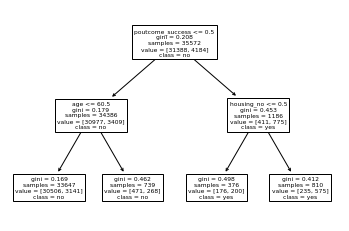

In [2]:
treeclf = tree.DecisionTreeClassifier(max_depth=2)
treeresults = treeclf.fit(X_train, y_train)

tree.plot_tree(treeclf, feature_names=X.columns, class_names=["no", "yes"])

In [9]:
# check accuracy of train vs test. Where do we notice overfitting?

depths = [d for d in range(1, 20)]
train_accuracy = []
test_accuracy = []

for d in depths:
    treeclf = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    treeclf.fit(X_train, y_train)
    test_accuracy.append(treeclf.score(X_test, y_test))
    train_accuracy.append(treeclf.score(X_train, y_train))

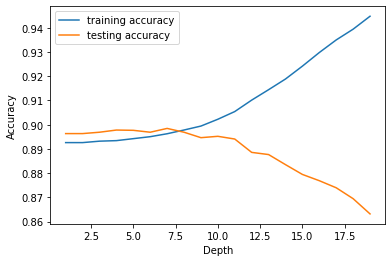

In [11]:
import matplotlib.pyplot as plt

plt.plot(depths, train_accuracy)
plt.plot(depths, test_accuracy)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend(["training accuracy", "testing accuracy"], loc=0)
plt.show()

## Random Forests

An often-used technique in statistical learning are `ensemble methods`. This describes the technique of not using just one learning method but instead using multiple.

Random Forests describe the technique of utilizing multiple decision trees (hence the name forest) to generate an "average tree" that best describes the dataset.

* [Bagging - ISLR](https://www.youtube.com/watch?v=omSN-shKM1Y&list=PLAOUn-KLSAVOqj5TG8E1HTb8Txwxe6OtV&index=4)
* [Tree-Based Methods Ch. 8.2](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)

This technique also allows us to extract "feature importance" in order to indicate which predictors actually explain the probability of a feature predicting a target.

In [15]:
from sklearn.ensemble import RandomForestClassifier

forestclf = RandomForestClassifier(max_depth=2, random_state=0)
forestclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [18]:
# print out importance of each feature
# "The higher, the more important the feature. The importance of a feature is computed as the (normalized) 
# total reduction of the criterion brought by that feature. It is also known as the Gini importance."
for i in range(len(X_train.columns)):
    print(X_train.columns[i], forestclf.feature_importances_[i])
    

age 0.06871596224934387
balance 0.01309784663789937
campaign 0.009300514192462512
pdays 0.08887013877165915
previous 0.03905033685225463
job_admin. 6.988768279535535e-05
job_blue-collar 0.008347183164997898
job_entrepreneur 0.00010212467207445674
job_housemaid 0.0
job_management 0.00020636509589836495
job_retired 0.017939388905417273
job_self-employed 5.197864343098235e-05
job_services 0.0
job_student 0.01233135121079881
job_technician 0.0
job_unemployed 3.676301080117051e-05
job_unknown 0.0
marital_divorced 7.613242260105728e-05
marital_married 0.00377665830638604
marital_single 0.005109451890018595
education_primary 0.0
education_secondary 0.0
education_tertiary 0.0026205199162943724
education_unknown 0.0
default_no 0.0
default_yes 9.888700577533392e-06
housing_no 0.08148988134539566
housing_yes 0.076872914856451
loan_no 0.006057737567464498
loan_yes 0.0046208122072705846
contact_cellular 0.04917212327001953
contact_telephone 0.00010596745786062487
contact_unknown 0.08576212440971648

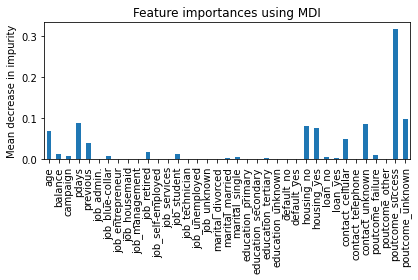

In [20]:
# to better visualize these importances we can also utilize matplotlib
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

forest_importances = pd.Series(forestclf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Cross Validation

This is our first forray into more complex statistical methods of analysis. To preview `cross-validation`, check out the listed link:

https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

## Dashboard Engineering

After completing your data analysis, it’s now customary to extract your insight and model it on a Tableau or Power BI dashboard.

These dashboards should abide by certain principles that we will explore visually:

* Minimizes cognitive load
* Tells a story
* Expresses meaning of data

To reduce complexity, we should abide by the following principles:

1. Use consistent color palette : https://www.canva.com/colors/color-wheel/ 
* i.e. utilize color theory

2. Contain at most 4-5 graphs
* Be selective on graphs. Which graph BEST models your relationship?
* Time Data : Line-Plot
* Categorical Data: Box-Plot

3. Group information into sections:
* Data from past month
* Data from past year

To best communicate findings, we should abide by the following principles (https://www.storytellingwithdata.com/blog/from-dashboard-to-story) 


1. Considers audience knowledge-level
* High knowledge? Utilize statistics
* Low knowledge? Utilize visualizations & text.

2. Be selective with visualizations, but generous with explanations
* Helps with cognitive complexity!
* Let your graphs follow a logical flow & grouping
* Once again, choose the BEST possible visualizations. Be sure to attach text that explains a phenomenon. (i.e. when business analyst positions required SQL, they saw a $20,000 increase in salary offers)

3. Hide unneeded statistics. (ex: size of sample, central tendency, histograms, p-values, R2, etc)

1. Do not hesitate to use units & contextualize data! Do not utilize numbers by themselves.
* Always include units in your visualizations & explanations.
* Dollars, views, etc

2. Discuss what stats are needed to achieve discrete outcome(if available).
* To achieve 100 likes …
* To achieve a starting salary of 80k…

3. Do not explore data, but explain data findings.